# Population Survey

Examining data is an important first step of every type of data analysis. This assignment has two goals 1)
learn to empirically identify causal effects and 2) learn (or warm up) the basics of data management
using Stata.

Using the 2017 March Current Population Survey (CPS), prepare a document with the following:

Write 1-2 short paragraphs describing the data structure (provide background information about the
March CPS and the survey methodology) and a research question you will explore using this data set.
For example, the effect of schooling on earnings. Relate your question to the principles of causal
inference. DATA

In [1]:
use cpsmar2017.dta

summarize




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     hrecord |    185,914           1           0          1          1
       h_seq |    185,914    49105.88    27666.73          4      95006
       hhpos |    185,914           0           0          0          0
      hunits |    185,914    1.651543    1.332617          1          5
    hefaminc |    185,914     11.3518    3.980714          1         16
-------------+---------------------------------------------------------
    h_respnm |    185,914    1.332643    .7364275          0         14
      h_year |    185,914        2017           0       2017       2017
    h_hhtype |    185,914           1           0          1          1
    h_numper |    185,914     3.51242    1.721792          1         16
     hnumfam |    185,914    1.234087    .5672066          1         10
-------------+-----------------------------------------------

In [2]:
regress a_herntf a_age a_maritl a_sex a_hga prdtrace


      Source |       SS           df       MS      Number of obs   =   185,914
-------------+----------------------------------   F(5, 185908)    =      5.75
       Model |  .002629205         5  .000525841   Prob > F        =    0.0000
    Residual |  16.9958163   185,908  .000091421   R-squared       =    0.0002
-------------+----------------------------------   Adj R-squared   =    0.0001
       Total |  16.9984455   185,913  .000091432   Root MSE        =    .00956

------------------------------------------------------------------------------
    a_herntf |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       a_age |  -1.94e-06   1.48e-06    -1.31   0.192    -4.85e-06    9.72e-07
    a_maritl |  -.0000357   .0000104    -3.44   0.001    -.0000561   -.0000154
       a_sex |  -.0000606   .0000444    -1.37   0.172    -.0001477    .0000264
       a_hga |   2.61e-06   1.87e-06     1.40   0.

Use the variable "wsal_val" for annual wage and salary earnings. Drop observations if "wsal_val == 0."

In [3]:
drop if wsal_val == 0



(98,224 observations deleted)


"hrswk" is hours worked per week and "wkswork" is weeks worked per year. Use these two variables and "wsal_val" to construct the wage rate. Drop if the wage rate is less than 1.

In [4]:
gen wage_rate = (wsal_val)/(hrswk*wkswork)
drop if wage_rate < 1





(271 observations deleted)


Take the log of the wage rate and use the code "kdensity" to plot the log wage density. Copy-paste it your breakout sheet.

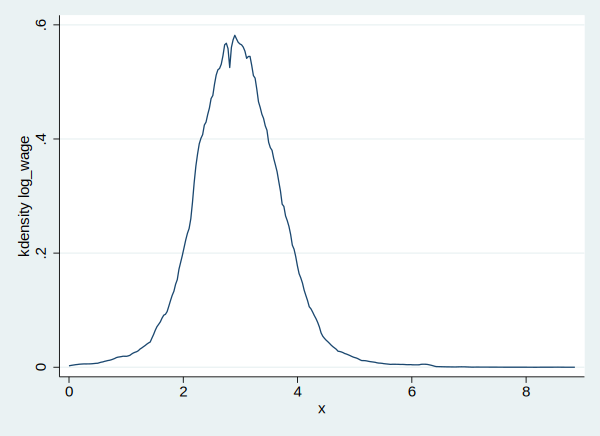

In [5]:
gen log_wage = log(wage_rate)
twoway kdensity log_wage

Use the variable "pehspnon" to plot the log wage density by Hispanic and non-Hispanic. Copy-paste it into your breakout sheet.






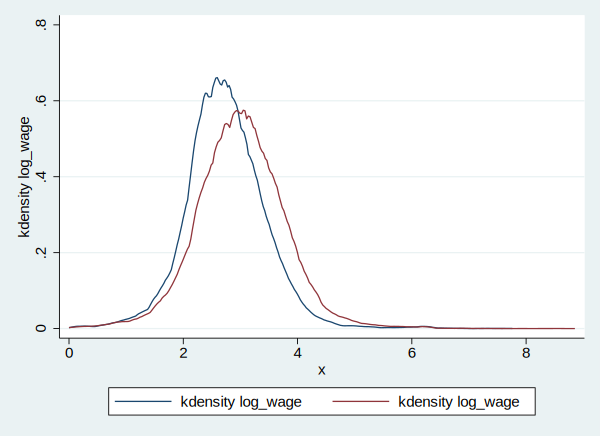

In [6]:
twoway kdensity log_wage if pehspnon == 1 || kdensity log_wage if pehspnon == 2

Present summary statistics (mean, standard deviation, sample size etc.) in a few tables and
appropriate graphs that describe your data. Choose the 2—3 graphs or tables (tables+graphs=2-3) that
best help describe the data. DESCRIPTIVE STATISTICS

Write 1-2 short paragraphs about your summary statistics and explain whether it is possible to
disentangle any causal effects. CAUSAL EFFECT

Finally, carry out a hypothesis test for a population mean using the outcome variable and independent
variable. Make sure to show each step (use five components), interpret the conclusion, and append
the Stata code. STATISTICAL INFERENCE